# Prerequisites

Importing the libraries, set the column names and use pandas to load the dataset

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
cols = ['label','lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude', 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt', 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag', 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj','m_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz', compression='gzip', names=cols)

`df.head()` will show us the first 5 rows of the imported dataset.



In [ ]:
df.head()

,label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,1.374992,-0.653674,0.930349,1.107436,1.138904,-1.578198,-1.046985,0.000000,0.657930,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,-0.213642,1.271015,2.214872,0.499994,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,1.540659,-0.819690,2.214872,0.993490,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,-0.676016,0.736159,2.214872,1.298720,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,1.020974,0.971407,2.214872,0.596761,-0.350273,0.631194,0.000000,0.479999,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


`df.info()` will show a quick summary of the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000000 entries, 0 to 10999999
Data columns (total 29 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   label                     float64
 1   lepton pT                 float64
 2   lepton eta                float64
 3   lepton phi                float64
 4   missing energy magnitude  float64
 5   missing energy phi        float64
 6   jet 1 pt                  float64
 7   jet 1 eta                 float64
 8   jet 1 phi                 float64
 9   jet 1 b-tag               float64
 10  jet 2 pt                  float64
 11  jet 2 eta                 float64
 12  jet 2 phi                 float64
 13  jet 2 b-tag               float64
 14  jet 3 pt                  float64
 15  jet 3 eta                 float64
 16  jet 3 phi                 float64
 17  jet 3 b-tag               float64
 18  jet 4 pt                  float64
 19  jet 4 eta                 float64
 20  jet 4 phi             

`df.describe()` will show as some of the data and their statistical properties.

In [ ]:
df.describe()

,label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,5.299203e-01,9.914658e-01,-8.297618e-06,-1.327225e-05,9.985364e-01,2.613459e-05,9.909152e-01,-2.027520e-05,7.716199e-06,9.999687e-01,9.927294e-01,-1.026444e-05,-2.076887e-05,1.000008e+00,9.922591e-01,1.459561e-05,3.678632e-06,1.000011e+00,9.861087e-01,-5.756954e-06,1.744903e-05,1.000000e+00,1.034290e+00,1.024805e+00,1.050554e+00,1.009742e+00,9.729596e-01,1.033036e+00,9.598120e-01
std,4.991040e-01,5.653777e-01,1.008827e+00,1.006346e+00,6.000185e-01,1.006326e+00,4.749747e-01,1.009303e+00,1.005901e+00,1.027808e+00,4.999939e-01,1.009331e+00,1.006154e+00,1.049398e+00,4.876623e-01,1.008747e+00,1.006305e+00,1.193676e+00,5.057777e-01,1.007694e+00,1.006366e+00,1.400209e+00,6.746354e-01,3.808074e-01,1.645763e-01,3.974453e-01,5.254063e-01,3.652556e-01,3.133378e-01
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.375024e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,1.889811e-01,-2.913090e+00,-1.742372e+00,0.000000e+00,2.636076e-01,-2.729663e+00,-1.742069e+00,0.000000e+00,3.653542e-01,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.786215e-02,2.951122e-01,3.307214e-01
25%,0.000000e+00,5.907533e-01,-7.383225e-01,-8.719308e-01,5.768156e-01,-8.712081e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,6.564608e-01,-6.944718e-01,-8.701791e-01,0.000000e+00,6.508527e-01,-6.998083e-01,-8.711343e-01,0.000000e+00,6.177673e-01,-7.141902e-01,-8.714789e-01,0.000000e+00,7.906095e-01,8.462266e-01,9.857525e-01,7.675732e-01,6.738168e-01,8.193964e-01,7.703901e-01
50%,1.000000e+00,8.533714e-01,-5.415563e-05,-2.410638e-04,8.916277e-01,2.125454e-04,8.948193e-01,-2.543566e-05,5.813991e-05,1.086538e+00,8.901377e-01,6.027267e-05,3.514990e-04,0.000000e+00,8.972494e-01,1.728937e-04,-7.519117e-04,0.000000e+00,8.682333e-01,3.721330e-04,-2.642369e-04,0.000000e+00,8.949304e-01,9.506853e-01,9.897798e-01,9.165110e-01,8.733798e-01,9.473447e-01,8.719701e-01
75%,1.000000e+00,1.236226e+00,7.382142e-01,8.709940e-01,1.293056e+00,8.714708e-01,1.170740e+00,6.871941e-01,8.683126e-01,2.173076e+00,1.201875e+00,6.945924e-01,8.698727e-01,2.214872e+00,1.221798e+00,7.001541e-01,8.713947e-01,2.548224e+00,1.220930e+00,7.141017e-01,8.716055e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.000000e+00,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,1.164708e+01,2.913210e+00,1.743175e+00,2.214872e+00,1.470899e+01,2.730009e+00,1.742884e+00,2.548224e+00,1.288257e+01,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


## Test set creation

We pick 0.5% of the dataset to create a train set. Lets set the `random_state` to 20 for testing purposes.
We will use the method `train_test_split()` from the library `scikit-learn`

In [ ]:
from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(df, test_size=.995, random_state=20)
test_set.head()

,label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
808665,0.0,1.998093,-0.640926,0.341656,0.747803,1.368323,1.059071,0.177226,-1.417482,2.173076,0.841035,-0.339920,1.236060,0.000000,0.989802,-1.282368,-0.699721,2.548224,1.079024,-2.162470,-0.024680,0.000000,1.845848,1.511245,1.352939,1.053185,1.360943,1.312540,1.251745
4763416,1.0,0.465941,1.670302,-1.297509,1.412817,0.683668,0.638227,-0.159452,-0.977863,1.086538,0.615920,1.467806,1.556197,0.000000,0.362307,1.300918,-0.606526,0.000000,1.237725,0.316845,0.234566,3.101961,0.673939,0.936911,1.098157,0.836553,0.874043,0.925638,0.774393
10518306,0.0,1.036929,0.104161,-0.538457,0.476880,-1.453481,1.175412,0.645604,-0.959568,2.173076,0.746104,-0.310779,1.400290,0.000000,2.620973,-0.383042,0.666143,2.548224,0.815901,-1.339640,0.692369,0.000000,0.926529,0.930962,0.988453,0.908463,2.498434,1.356112,1.104541
458854,0.0,0.614911,0.052540,0.519767,0.637370,-0.599588,0.629708,0.949605,-1.740683,0.000000,0.468991,0.984062,0.161355,1.107436,0.522122,0.875832,-0.581563,0.000000,0.905961,1.293747,1.296668,0.000000,0.891987,0.743872,0.986749,0.530788,0.435412,0.513260,0.631654
3560985,1.0,0.441784,0.840481,0.681786,0.969819,1.540552,0.611478,0.209903,-1.190743,2.173076,0.916955,-0.229184,1.655512,0.000000,1.207046,0.072993,0.464774,0.000000,2.650217,0.167770,-0.167848,3.101961,1.440640,1.127436,0.984589,1.049358,1.073833,0.947300,0.831430


Copying the training set.

In [ ]:
df = train_set.copy()

Lets calculate the correlation.


In [ ]:
corr_matrix = df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                       1.000000
jet 1 pt                    0.054779
jet 4 pt                    0.034547
jet 2 pt                    0.017221
m_jjj                       0.015380
jet 3 pt                    0.013633
jet 4 b-tag                 0.011159
lepton phi                  0.008640
m_lv                        0.007287
m_jj                        0.006944
jet 1 eta                   0.005565
missing energy phi          0.003862
lepton eta                  0.003001
jet 4 phi                   0.002016
jet 3 phi                   0.001490
jet 4 eta                   0.001014
jet 3 eta                   0.000749
jet 2 eta                  -0.000792
jet 1 b-tag                -0.004427
jet 2 phi                  -0.005067
jet 1 phi                  -0.009335
jet 3 b-tag                -0.016493
m_jlv                      -0.038001
lepton pT                  -0.051146
jet 2 b-tag                -0.054563
m_wbb                      -0.072907
missing energy magnitude   -0.104169
m

In [ ]:
corr_matrix

,label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
label,1.000000,-0.051146,0.003001,0.008640,-0.104169,0.003862,0.054779,0.005565,-0.009335,-0.004427,0.017221,-0.000792,-0.005067,-0.054563,0.013633,0.000749,0.001490,-0.016493,0.034547,0.001014,0.002016,0.011159,0.006944,0.015380,0.007287,-0.038001,-0.152793,-0.072907,-0.131854
lepton pT,-0.051146,1.000000,-0.003208,0.004558,-0.143031,0.007811,0.167070,0.005955,-0.001799,-0.001050,0.009779,0.005078,-0.004465,-0.007064,-0.007501,0.002613,0.002137,0.008589,-0.021466,0.002066,-0.000745,-0.002777,0.032994,0.026386,0.281499,0.134717,0.012670,0.099137,0.143558
lepton eta,0.003001,-0.003208,1.000000,0.005544,-0.003046,-0.005275,-0.002912,0.262206,0.006014,-0.000740,-0.003086,0.267880,-0.005407,0.005471,-0.003894,0.222989,-0.001006,-0.009202,0.001001,0.174927,0.002970,0.003900,-0.005008,-0.006360,-0.007537,-0.005594,-0.004628,-0.004921,-0.007151
lepton phi,0.008640,0.004558,0.005544,1.000000,0.004030,-0.042013,0.001326,0.000113,-0.171033,-0.004308,-0.002544,-0.002588,-0.095852,0.002152,-0.006985,-0.001656,-0.082403,-0.002317,-0.002134,-0.000638,-0.061779,0.001037,-0.006894,-0.005765,0.006069,0.006554,-0.000845,-0.000958,-0.000100
missing energy magnitude,-0.104169,-0.143031,-0.003046,0.004030,1.000000,-0.003262,0.200710,0.002587,0.006068,-0.031011,0.039853,0.001262,0.005036,-0.004573,0.022403,-0.003611,-0.002704,0.010342,0.010314,0.001964,-0.005037,0.005139,0.046942,0.043326,0.166061,0.281247,0.028298,0.218529,0.303832
missing energy phi,0.003862,0.007811,-0.005275,-0.042013,-0.003262,1.000000,0.007933,-0.007095,-0.153140,0.000468,-0.001727,-0.005689,-0.060651,0.001388,-0.001908,0.001651,-0.053385,-0.003029,0.005020,-0.011212,-0.043644,-0.005634,-0.003409,-0.006002,-0.002604,0.002856,0.005472,0.002631,0.000022
jet 1 pt,0.054779,0.167070,-0.002912,0.001326,0.200710,0.007933,1.000000,0.002498,-0.002258,-0.017878,0.490755,0.006101,0.001269,-0.030779,0.263720,-0.002340,0.004164,-0.024438,0.160070,-0.003969,-0.000755,-0.003977,0.194689,0.267535,0.015769,0.277319,0.335214,0.485983,0.454008
jet 1 eta,0.005565,0.005955,0.262206,0.000113,0.002587,-0.007095,0.002498,1.000000,0.001952,-0.004512,0.003316,0.253620,0.003082,-0.002343,0.003303,0.234625,-0.001718,0.000836,0.005050,0.191420,0.000819,0.002025,-0.003591,-0.004906,0.002417,0.003882,0.001841,0.004773,0.004665
jet 1 phi,-0.009335,-0.001799,0.006014,-0.171033,0.006068,-0.153140,-0.002258,0.001952,1.000000,-0.001693,0.001589,0.000874,-0.197119,-0.000651,0.002170,-0.003396,-0.126327,0.001956,0.001247,-0.004615,-0.106483,-0.005614,0.004152,0.005764,-0.003280,-0.007563,-0.001856,0.000552,0.000955
jet 1 b-tag,-0.004427,-0.001050,-0.000740,-0.004308,-0.031011,0.000468,-0.017878,-0.004512,-0.001693,1.000000,-0.137605,-0.004723,-0.004369,-0.253641,-0.154095,0.004287,-0.003265,-0.257056,-0.149638,0.001587,0.003587,-0.233997,-0.117301,-0.075018,0.000398,0.128897,0.269037,0.108459,-0.000717


## Data Preparation

In [ ]:
predictors = train_set.drop('label', axis=1)
labels = train_set['label'].copy()
predictors.head()

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
4094969,0.895464,-0.476325,-0.480196,0.838714,0.620802,0.942455,-1.132849,-0.080326,2.173076,1.750688,0.684879,1.635538,2.214872,1.028263,-0.579656,-1.326017,0.000000,1.245758,1.056392,1.273362,0.000000,0.837922,1.431913,1.005501,0.735570,2.756453,1.857552,1.481727
9718664,0.491928,1.456029,-0.203320,1.072093,0.822020,0.372109,0.184157,-0.253846,0.000000,0.995519,0.218619,1.374768,2.214872,1.125908,-0.347542,-0.936038,2.548224,0.720242,1.618548,-0.019686,0.000000,0.804681,0.951041,0.989944,0.783229,1.040373,0.822689,0.750652
2557042,0.297939,-2.048310,-1.034505,0.927885,-0.016678,0.611845,-0.145589,-0.869759,2.173076,0.835244,-2.101992,1.248821,0.000000,0.820854,0.137620,-1.634450,0.000000,0.773061,-0.191177,0.638542,3.101961,1.935533,1.202371,0.989316,0.710796,0.712252,0.944924,0.824361
4529031,1.392516,0.319408,-1.640414,1.111012,-0.901334,1.558514,0.118802,0.837268,2.173076,0.681642,-0.794523,-1.018873,0.000000,1.111683,0.102121,-0.199347,0.000000,1.024014,0.365149,-1.064033,0.000000,0.939448,1.180288,1.066015,0.723214,0.931009,0.991612,0.845068
8930520,0.568426,-1.886632,1.398667,1.302158,-1.113407,0.766203,0.429734,0.790700,0.000000,1.047643,0.304100,-0.634376,2.214872,0.718116,0.221363,0.062591,0.000000,1.216306,-0.044600,-1.598414,3.101961,0.849519,0.990638,0.989915,1.216395,0.800225,1.325226,1.149764


Since the dataset is massive we will create keep only some of the entries from the test set

In [ ]:
test_predictors = test_set.drop('label', axis=1)[:400000]
test_labels = test_set['label'].copy()[:400000]
test_predictors.head()

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
808665,1.998093,-0.640926,0.341656,0.747803,1.368323,1.059071,0.177226,-1.417482,2.173076,0.841035,-0.339920,1.236060,0.000000,0.989802,-1.282368,-0.699721,2.548224,1.079024,-2.162470,-0.024680,0.000000,1.845848,1.511245,1.352939,1.053185,1.360943,1.312540,1.251745
4763416,0.465941,1.670302,-1.297509,1.412817,0.683668,0.638227,-0.159452,-0.977863,1.086538,0.615920,1.467806,1.556197,0.000000,0.362307,1.300918,-0.606526,0.000000,1.237725,0.316845,0.234566,3.101961,0.673939,0.936911,1.098157,0.836553,0.874043,0.925638,0.774393
10518306,1.036929,0.104161,-0.538457,0.476880,-1.453481,1.175412,0.645604,-0.959568,2.173076,0.746104,-0.310779,1.400290,0.000000,2.620973,-0.383042,0.666143,2.548224,0.815901,-1.339640,0.692369,0.000000,0.926529,0.930962,0.988453,0.908463,2.498434,1.356112,1.104541
458854,0.614911,0.052540,0.519767,0.637370,-0.599588,0.629708,0.949605,-1.740683,0.000000,0.468991,0.984062,0.161355,1.107436,0.522122,0.875832,-0.581563,0.000000,0.905961,1.293747,1.296668,0.000000,0.891987,0.743872,0.986749,0.530788,0.435412,0.513260,0.631654
3560985,0.441784,0.840481,0.681786,0.969819,1.540552,0.611478,0.209903,-1.190743,2.173076,0.916955,-0.229184,1.655512,0.000000,1.207046,0.072993,0.464774,0.000000,2.650217,0.167770,-0.167848,3.101961,1.440640,1.127436,0.984589,1.049358,1.073833,0.947300,0.831430


# Predictors

In [ ]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55000 entries, 4094969 to 9420131
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lepton pT                 55000 non-null  float64
 1   lepton eta                55000 non-null  float64
 2   lepton phi                55000 non-null  float64
 3   missing energy magnitude  55000 non-null  float64
 4   missing energy phi        55000 non-null  float64
 5   jet 1 pt                  55000 non-null  float64
 6   jet 1 eta                 55000 non-null  float64
 7   jet 1 phi                 55000 non-null  float64
 8   jet 1 b-tag               55000 non-null  float64
 9   jet 2 pt                  55000 non-null  float64
 10  jet 2 eta                 55000 non-null  float64
 11  jet 2 phi                 55000 non-null  float64
 12  jet 2 b-tag               55000 non-null  float64
 13  jet 3 pt                  55000 non-null  float64
 14

In [ ]:
test_predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400000 entries, 808665 to 5539827
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   lepton pT                 400000 non-null  float64
 1   lepton eta                400000 non-null  float64
 2   lepton phi                400000 non-null  float64
 3   missing energy magnitude  400000 non-null  float64
 4   missing energy phi        400000 non-null  float64
 5   jet 1 pt                  400000 non-null  float64
 6   jet 1 eta                 400000 non-null  float64
 7   jet 1 phi                 400000 non-null  float64
 8   jet 1 b-tag               400000 non-null  float64
 9   jet 2 pt                  400000 non-null  float64
 10  jet 2 eta                 400000 non-null  float64
 11  jet 2 phi                 400000 non-null  float64
 12  jet 2 b-tag               400000 non-null  float64
 13  jet 3 pt                  400000 non-n

We will now import all the necessary libraries and functions

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### Decision Tree Classifier

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(predictors,labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = classifier.predict(predictors)

In [ ]:
print(confusion_matrix(labels, y_pred))
print(classification_report(labels, y_pred))
print('Accuracy of Decision Tree classifier on traing set: {:.2f}'
     .format(classifier.score(predictors,labels)))
score_dectree=classifier.score(test_predictors,test_labels)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(score_dectree))

[[25810     0]
 [    0 29190]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     25810
         1.0       1.00      1.00      1.00     29190

    accuracy                           1.00     55000
   macro avg       1.00      1.00      1.00     55000
weighted avg       1.00      1.00      1.00     55000

Accuracy of Decision Tree classifier on traing set: 1.00
Accuracy of Decision Tree classifier on test set: 0.63


### Naive Bayes

In [ ]:
classifier = GaussianNB()
classifier.fit(predictors,labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(predictors)

In [ ]:
print(confusion_matrix(labels, y_pred))
print(classification_report(labels, y_pred))
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(classifier.score(predictors,labels)))
score_gnb=classifier.score(test_predictors,test_labels)
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(score_gnb))

[[ 8338 17472]
 [ 4726 24464]]
              precision    recall  f1-score   support

         0.0       0.64      0.32      0.43     25810
         1.0       0.58      0.84      0.69     29190

    accuracy                           0.60     55000
   macro avg       0.61      0.58      0.56     55000
weighted avg       0.61      0.60      0.57     55000

Accuracy of GNB classifier on training set: 0.60
Accuracy of GNB classifier on test set: 0.59


### Logistic Regression

In [ ]:
classifier = LogisticRegression()
classifier.fit(predictors,labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(predictors)

In [ ]:
print(confusion_matrix(labels, y_pred))
print(classification_report(labels, y_pred))
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(classifier.score(predictors, labels)))
score_logreg=classifier.score(test_predictors, test_labels)
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(score_logreg))

[[13614 12196]
 [ 7413 21777]]
              precision    recall  f1-score   support

         0.0       0.65      0.53      0.58     25810
         1.0       0.64      0.75      0.69     29190

    accuracy                           0.64     55000
   macro avg       0.64      0.64      0.64     55000
weighted avg       0.64      0.64      0.64     55000

Accuracy of Logistic Regression classifier on training set: 0.64
Accuracy of Logistic Regression classifier on test set: 0.64


### K nearest neighbors 

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(predictors,labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(predictors)

In [ ]:
print(confusion_matrix(labels, y_pred))
print(classification_report(labels, y_pred))
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(classifier.score(predictors, labels)))
score_knn=classifier.score(test_predictors, test_labels)
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(score_knn))

[[18965  6845]
 [ 4798 24392]]
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.77     25810
         1.0       0.78      0.84      0.81     29190

    accuracy                           0.79     55000
   macro avg       0.79      0.79      0.79     55000
weighted avg       0.79      0.79      0.79     55000

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.58


### Support Vector Machines

In [ ]:
classifier = SVC()
classifier.fit(predictors,labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = classifier.predict(predictors)

In [ ]:
print(confusion_matrix(labels, y_pred))
print(classification_report(labels, y_pred))
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(classifier.score(predictors,labels)))
score_svm=classifier.score(test_predictors,test_labels)
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(score_svm))

[[14997 10813]
 [ 5525 23665]]
              precision    recall  f1-score   support

         0.0       0.73      0.58      0.65     25810
         1.0       0.69      0.81      0.74     29190

    accuracy                           0.70     55000
   macro avg       0.71      0.70      0.70     55000
weighted avg       0.71      0.70      0.70     55000

Accuracy of SVM classifier on training set: 0.70
Accuracy of SVM classifier on test set: 0.67


# Results

We will now plot the scores of each classifier on the test set

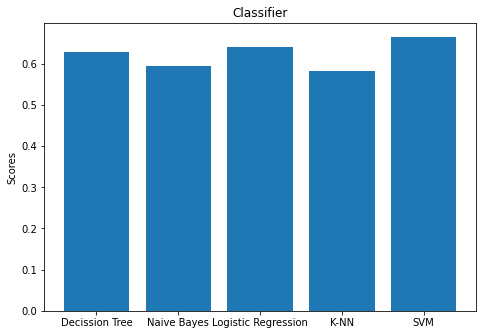

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifiers = ['Decission Tree', 'Naive Bayes', 'Logistic Regression', 'K-NN', 'SVM']
scores = [score_dectree,score_gnb,score_logreg,score_knn,score_svm]
ax.set_ylabel('Scores')
ax.set_title('Classifier')
ax.bar(classifiers,scores)

plt.show()